# Jeu de données Iris

## Version pandas

In [26]:
import numpy as np
import pandas as pd
df = pd.read_csv("data/iris.csv")
print(df.columns)
df.describe() # species n'est pas dans la description (variable qualitative)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
import pandas as pd

In [28]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## solutions

In [29]:
df.species.nunique() # nombre de classes (espèces) = 3
print(df.shape) # 150 individus (relativement peu)
print(df.groupby('species')['species'].count()) # solution 1 avec groupby()
print(df.species.value_counts()) # solution 2 (plus simple) avec value_counts()
# 50 individus par classe... pas si mal (et pas de déséquilibre)

(150, 5)
species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


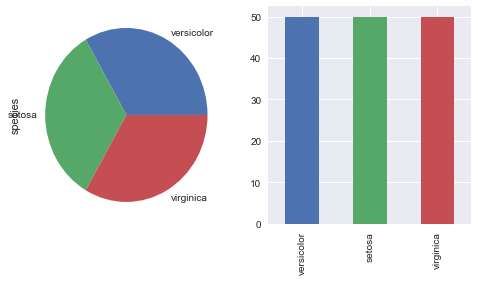

In [30]:
%matplotlib inline
%config InlineBackend.format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.figsize'] = (10,6)

plt.figure(figsize=(8,4)) 

df['y'] = df.species.astype('category') # conversion en variable catégorielle
df['y'] = df.species.replace({'setosa':1, 'versicolor':2, 'virginica':3}) # conversion en nombres
counts = df.species.value_counts()
plt.subplot(121)
counts.plot.pie(y='species')
plt.subplot(122)
counts.plot.bar(x=None, y='species', stacked=True); # stacked=True => barres devraient etre empilees

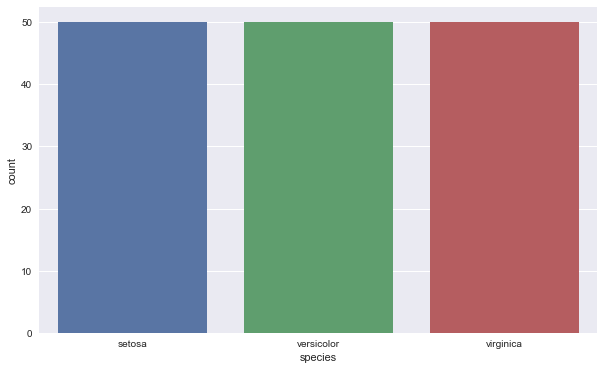

In [31]:
sns.set(style="darkgrid")
ax = sns.countplot(x="species", data=df) # directement sur df (et non counts) 

In [32]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,y
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
y,0.782561,-0.419446,0.949043,0.956464,1.000000


Quels prédicteurs/features sont les plus importants ?
(les plus susceptibles de discriminer les espèces d'IRIS)

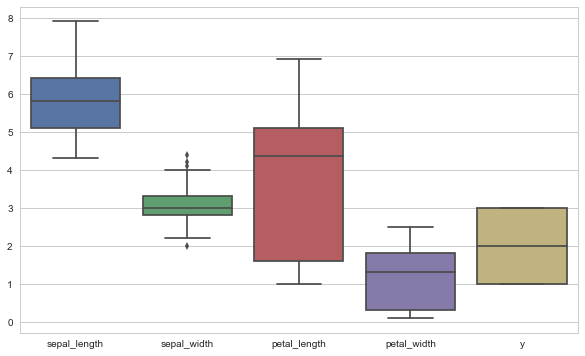

In [33]:
sns.set_style("whitegrid")
sns.boxplot(data=df); 

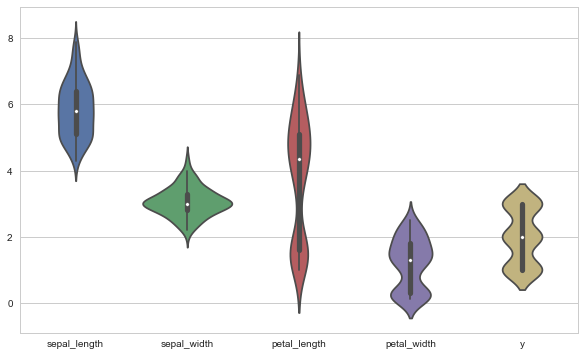

In [34]:
sns.violinplot(data=df); 

In [35]:
df.columns[:-2]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

plus de variabilité dans "petal length", et très peu dans "sepal width"

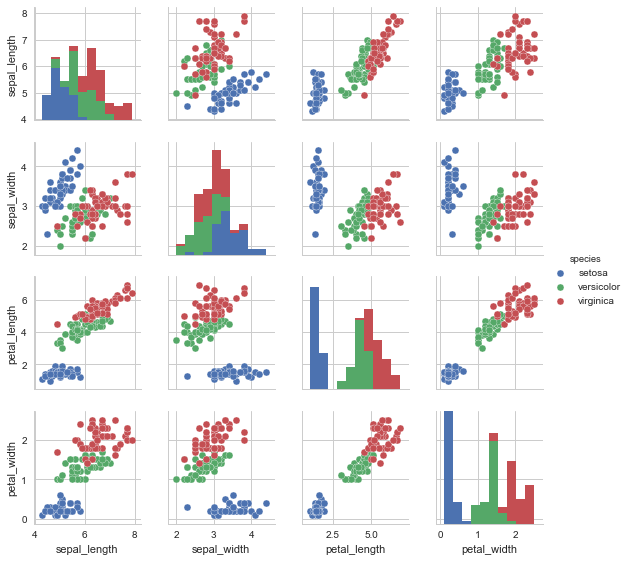

In [36]:
sns.pairplot(df, hue='species',vars=df.columns[:-2],size=2);

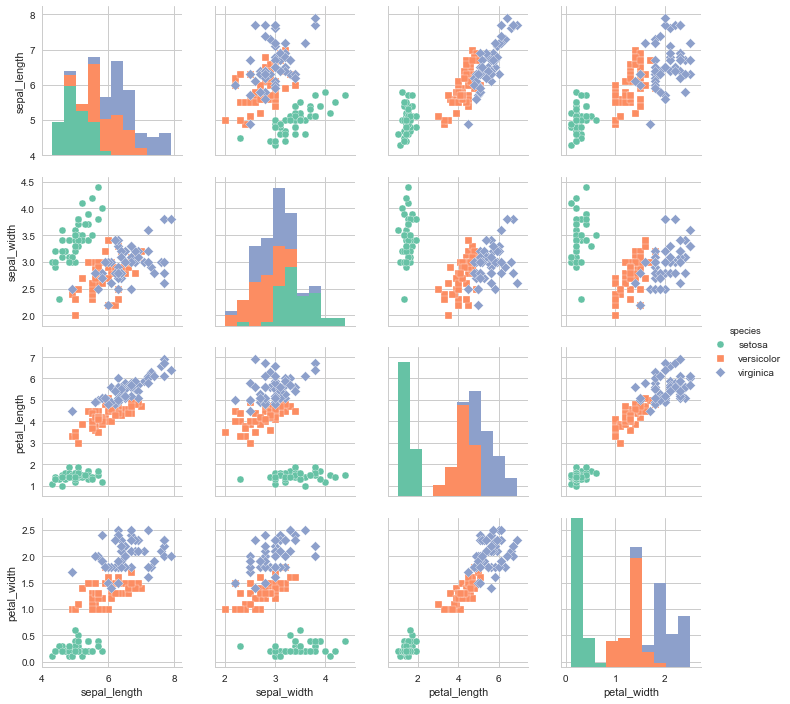

In [37]:
sns.pairplot(df, kind="scatter", hue="species", vars=df.columns[:-2], markers=["o", "s", "D"], palette="Set2")

## Quelle(s) classe(s) sera(ont) facile(s) à distinguer ?


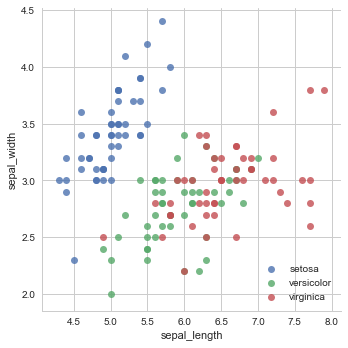

In [38]:
sns.lmplot( x="sepal_length", y="sepal_width", 
           data=df, fit_reg=False, hue='species', legend=False)
plt.legend(loc='lower right'); 

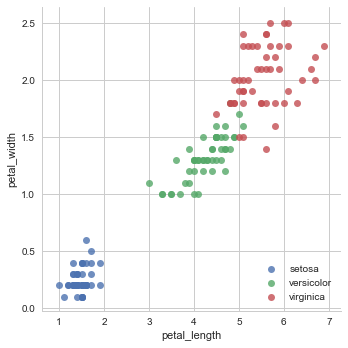

In [39]:
sns.lmplot( x="petal_length", y="petal_width", data=df, 
           fit_reg=False, hue='species', legend=False)
plt.legend(loc='lower right'); 

## IRIS : conclusion
Le jeu de données n'est pas très grand (150 individus et seulement 4 prédicteurs)
les prédicteurs liées aux pétales ne sont pas distribuées normalement
les variables sont corrélées (positivement), sauf "sepal width"
"petal length" puis "petal width" semblent les prédicteurs les plus prometteurs

la classe Sertosa ne posera certainement aucun problème
Toutes les analyses ne seront pas possibles (celles qui nécessitent la normalité, ou l'indépendance entre variables), mais on peut espérer des bons résultats...

## Version scikit-learn

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [43]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tr = scaler.transform(X_train)
X_test_tr = scaler.transform(X_test)

In [45]:
X_test_tr.shape, y_train.shape

((75, 4), (75,))